# Linear Regression in PyTorch

In this tutorial you will cover:

1. A recap of linear regression
2. Worked out example using real-world dataset

## A recap of linear regression

You might already be familiar with the premise of a linear regression problem. We have n feature variables (x) and a numerical target to predict (y). 
A loss function called the mean squared error (MSE) is used to minimize the error between predicted values of target and the actual values of target. Gradient Descent is mostly used to optimize the loss function.

Earlier while working with the AutoGrad library, we built a simple linear regression model by hand. We defined the loss function mathematically and optimized losses by hand. It was also built on dummy data that we defined ourselves.

But a real linear regression neural network does not work like that. You can make use of many of the inbuilt loss functions and optimizers as well as activation functions to build a more complex neural network from scratch.

For the example in this tutorial, you will learn how to apply supervised deep learning on a real world dataset. The dataset has admission details of different students from different colleges along with their exam scores, research experience and CGPA. We will try to predict the chance of admit into the target university based on these feature variables.

## Worked out example using real-world dataset

Let's start with the basics first. The first step in any deep learning or machine learning project is to import the required libraries as well as dataset. The dataset used here can be found on [Kaggle]().

In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('admissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


You can see that we have 8 columns in total, 7 feature variable columns and one target column. As you can already understand from the dataset, the chance of admit varies between 0 and 1. Let's check the number of entries in the dataset.

In [2]:
data.shape

(400, 8)

We have a total of 400 entries. Whenever working with a new dataset, it's always helpful to understand the relations between the feature and target variables. The best way to do it is through data visualisation. A graph or barplot can be informative even for a person who is seeing the dataset for the first time.

Let's plot some graphs to check how these variables are correlated.

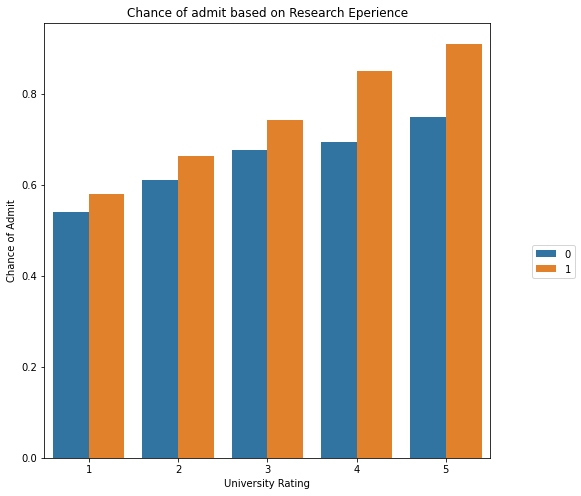

In [3]:
plt.figure(figsize=(8, 8))

sns.barplot('University Rating', 'Chance of Admit ', hue = 'Research', data = data, ci=None);

plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5));

plt.xlabel('University Rating');
plt.ylabel('Chance of Admit');

plt.title('Chance of admit based on Research Eperience');

It can be inferred that candidates with research experience have a better chance at getting an admit than those with no such experience. This also is positively correlated to the candidate's university ranking.

Let's check the effect of GRE scores on chance of admit.

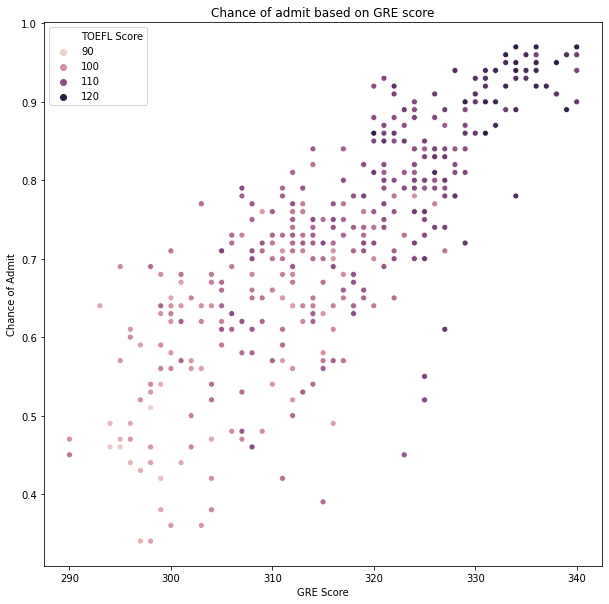

In [4]:
plt.figure(figsize=(10, 10))

fig = sns.scatterplot(x = 'GRE Score', y = 'Chance of Admit ', hue = 'TOEFL Score', data = data);

plt.xlabel('GRE Score');
plt.ylabel('Chance of Admit');

plt.title('Chance of admit based on GRE score');

Students with higher GRE score have a greater chance of admit. You will also notice that students with higher GRE scores are the ones who have a good score on TOEFL too. Clearky there is a positive correlation between the two.

Now what about CGPA?

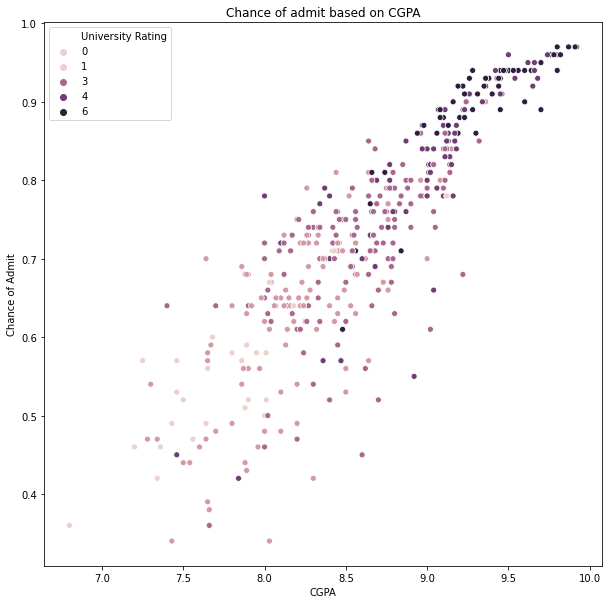

In [5]:
plt.figure(figsize=(10, 10))

fig = sns.scatterplot(x = 'CGPA', y = 'Chance of Admit ', hue='University Rating', data = data);

plt.xlabel('CGPA');
plt.ylabel('Chance of Admit');

plt.title('Chance of admit based on CGPA');

CGPA too is a deciding factor as can be seen from the scatterplot. A higher CGPA increases chances of admit. It is also interesting to note that most students with high CGPA are from a higher ranked university.

One last step in the data visualisation process is a heatmap. A heatmap will show you each variable's correlation with every other variable in the dataset. Though here we are only bothered with one target variable, it can be more uselful when you want to predict more than one outputs.

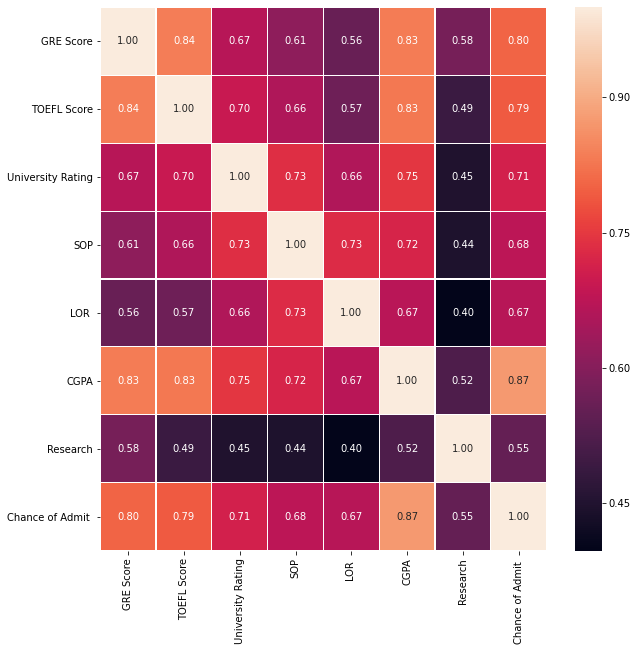

In [6]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

Now that we have a fair idea of how our dataset looks, let's get started on dividing it into feature variables (X) and target variable (Y).

In [7]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']

features = data[columns]

features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


The target variable here will be just the chance of admit.

In [8]:
target = data[['Chance of Admit ']]

target.head()

,Chance of Admit
Serial No.,
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65


For training any deep learning or machine learning model, it is necessary to divide your data into test and train sets. If you test your model on the same data that you trained it with, you will get inflated accuracy results. the true test of a model is when it performs well on data it hasnt seen before. 

Thus, all training processes are to be done on train set only, and the model is to tested for perfomance on the test set.

For dividing data into train and test sets, you can use the `train_test_split()` function from `sklearn` library.

In [9]:
from sklearn.model_selection import train_test_split

# Test and train split
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)

Now that the dataset has been split into training and test data, the next step is to convert these dataframes into tensors. For a deep learning model we will be working with tensors only so all the relevant dataframes must be converted accordingly.

In [10]:
# Convert tensors

X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

Let's see how many data entries are present in the train and test sets.

In [11]:
X_train_tensor.shape, x_test_tensor.shape

(torch.Size([320, 7]), torch.Size([80, 7]))

The `train_test_split()` function has divided the data in a ratio of 80:20. That is why the train set has 320 entries and test set has 80 entries.

The next step is to import the `torch.utils.data` library. This class allows you to create a dataset compatible for deep learning model. for this purpose you will use the `.TensorDataset()` function to wrap training data tensors into one entity.


In [12]:
import torch.utils.data as data_utils 

train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor) # wrap training tensors into one 
                                                                      # training data tensor

All our training data is stored in one entity now, the `train_data`. 

While training this data, we will be using [batch gradient descent](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a). To divide the training data into batches, you will need to use another function called the `data.utils.DataLoader()` which divides the training dataset into batches and also has the option of shuffling entries in every batch to prevent the model from picking up any unecessary patterns.

In [13]:
# Divide data into batches
train_loader = data_utils.DataLoader(train_data, batch_size=50, shuffle=True) 

len(train_loader)

7

The training data has been divided into 7 batches, and gradient descent will be performed on each batch separately. This considerably speeds up the training process.

The next step is to define the number of hidden layers, and the dimensions of input and output layer and the loss function.

In [14]:
inp = X_train_tensor.shape[1] # number of data 
out = 1

hid = 10 

loss_fn = torch.nn.MSELoss() # loss function defined to be Mean Square Error

The loss fucntion here has been defined as MSE. The model has 10 hidden layers, and the number of dimensions in input layer are equal to number of datapoints in training dataset. 
The output layer has only 1 neuron because we are only going to need to obtain one output, that is the chance of admit.

Let's define our neural network sequence now.

In [43]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), # input layer of dimension inp_layer x hidden_layer
                            torch.nn.ReLU(), # ReLU activation fucntion after input
                            torch.nn.Linear(hid, out)) # output layer

optimizer = torch.optim.Adadelta(model.parameters(), lr = 0.001) # Adadelta optimizer

`torch.nn.Sequential()` allows us to define the sequence of layers in our neural network. Here we have the inpur layer, output layer and in between we have the activation function ReLU.

We have also defined a optimizer from `torch.optim` class, which has different kinds of optimization techniques. The optimizer used here is `Adadelta`, but you can choose from [different optimizers](https://pytorch.org/docs/stable/optim.html) available in this class.

Previously while working with autograd we built a linear model with no activation function. Here we have used ReLU. There are many other activation functions you can experiment with.

Let's come to the main step now, that is training our neural network. 
Below, we train our dataset for 10,000 iterations or epochs. We will also include a line of code to show us the loss after every 2000 epochs.

In [44]:
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1): 
    for i, (features, target) in enumerate(train_loader): # iterate for for all batches
        
        output = model(features) # 
        loss = loss_fn(output, target)
        
        optimizer.zero_grad() # sets optimizer gradients to zero
        
        loss.backward() # backpropagation on loss tensor
        
        optimizer.step() # updates the parameters
        
        if epoch % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item())) # print out loss after every 2000 epochs

Epoch [1/10000], Step [1/7], Loss: 212.6061
Epoch [1/10000], Step [2/7], Loss: 208.1677
Epoch [1/10000], Step [3/7], Loss: 212.8266
Epoch [1/10000], Step [4/7], Loss: 215.0114
Epoch [1/10000], Step [5/7], Loss: 208.1294
Epoch [1/10000], Step [6/7], Loss: 210.6184
Epoch [1/10000], Step [7/7], Loss: 214.3117
Epoch [2001/10000], Step [1/7], Loss: 0.0748
Epoch [2001/10000], Step [2/7], Loss: 0.0733
Epoch [2001/10000], Step [3/7], Loss: 0.0387
Epoch [2001/10000], Step [4/7], Loss: 0.0671
Epoch [2001/10000], Step [5/7], Loss: 0.0649
Epoch [2001/10000], Step [6/7], Loss: 0.0602
Epoch [2001/10000], Step [7/7], Loss: 0.0566
Epoch [4001/10000], Step [1/7], Loss: 0.0321
Epoch [4001/10000], Step [2/7], Loss: 0.0223
Epoch [4001/10000], Step [3/7], Loss: 0.0324
Epoch [4001/10000], Step [4/7], Loss: 0.0190
Epoch [4001/10000], Step [5/7], Loss: 0.0316
Epoch [4001/10000], Step [6/7], Loss: 0.0263
Epoch [4001/10000], Step [7/7], Loss: 0.0278
Epoch [6001/10000], Step [1/7], Loss: 0.0173
Epoch [6001/10000

The true test of any trained neural network is how well it predicts the target variable. Let's check it's prediction for a random data sample from the test data.

In [46]:
sample = x_test.iloc[25] # obtain the 25th entry in test data
sample

GRE Score            303.00
TOEFL Score          100.00
University Rating      2.00
SOP                    3.00
LOR                    3.50
CGPA                   8.06
Research               1.00
Name: 353, dtype: float64

This data entry needs to be converted into a tensor for the model to be able to predict the chance of admit:

In [47]:
sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float) # convert to tensor
sample_tensor

tensor([303.0000, 100.0000,   2.0000,   3.0000,   3.5000,   8.0600,   1.0000])

Now let's check the prediction. Note that for y_pred we will be turning off gradient tracking because we dont need to perform any kind of backpropagation for `y_pred`.

In [48]:
with torch.no_grad(): # switch off gradient tracking
    y_pred = model(sample_tensor)

print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[25]))

Predicted count :  0.6850907206535339
Actual count :  Chance of Admit     0.64
Name: 353, dtype: float64


From this one entry, we could conclude that the model has perfomed fairly well in making a prediction.

But we cant make any conclusion on the basis of one prediction only, so let's get the prediction tensor.

In [49]:
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor) # obtain tensor of predicted values by using model on test data
    
    
y_pred = y_pred_tensor.detach().numpy() # convert into numpy array and detach from current computation graph

# Print a dataframe of actual and predicted values side by side
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})
# np.squeeze gives us only the first dimension values for an array
compare_df.sample(10)

,actual,predicted
61,0.83,0.793400
25,0.64,0.685094
31,0.62,0.586562
41,0.64,0.666362
59,0.57,0.782688
32,0.58,0.505756
54,0.80,0.812581
35,0.63,0.633370
38,0.87,0.752945
63,0.68,0.592457


A random sample of 10 predicted and actual values of y tells us that we are pretty close in predciting the actual value.

To determine the accuracy of this model however, we will need to use other metrics. The most popular one is the [R2 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html). The higher the R2 score, the better our model has performed.

In [50]:
sklearn.metrics.r2_score(y_test, y_pred)

0.681185627321022

The R2 score is only 68.1%, which means the model could have done better in terms of accuracy of predictions. One way to improve this score is using a different actiavtion function, or tweaking the optimzer used. 

You can also visualise the perfomance of the model with respect to given dataset.

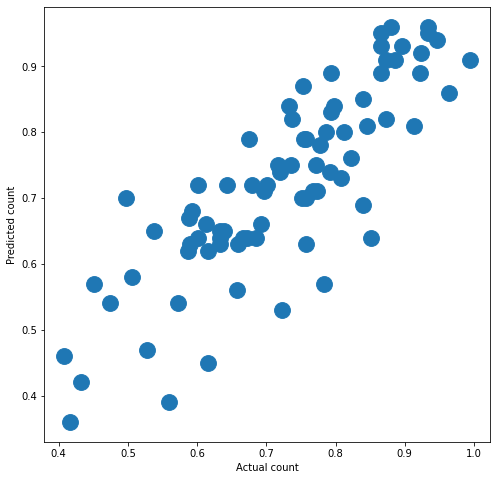

In [51]:
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test.values, s=250)

plt.xlabel("Actual count")
plt.ylabel("Predicted count")

plt.show()

You can notice that our model has performed well for higher values of chance of admit, but the perfomance for lower values is poor. This is why our accuracy score (R2 score) is average at best.

Give it a try yourself! Experiment with the activation functions and optimizers to find out what can give you the best results.

## References

Building your first PyTorch Solution by Janani Ravi [PluralSight](https://app.pluralsight.com/library/courses/building-your-first-pytorch-solution/table-of-contents)